<a href="https://colab.research.google.com/github/deepak-sin/Airline-Passenger-Referral/blob/main/Netflix_Movies_And_Tv_Shows_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies And Tv Shows Clustering**



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  **Rupesh Gandhi**
##### **Team Member 2 -**  **Nalini Ranjan**
##### **Team Member 3 -**  **Deepak Kumar**
##### **Team Member 4 -**  **DEDANIYA PRITKUMAR PRADIPBHAI**

# **Project Summary -**

In this analysis, we worked with a dataset of TV shows and movies available on Netflix as of 2021. The dataset was obtained from Flixable, a third-party Netflix search engine. We began by importing necessary libraries and cleaning the data, including addressing null values and making necessary replacements.

Next, we analyzed and visualized the data through various plots to understand the distribution and relationships. We performed hypothesis tests to compare means, examine associations between target age and country, and investigate associations between target age and duration.

To enhance the data, we conducted feature engineering, which involved text data processing, such as expanding contractions, converting to lowercase, removing punctuation and stopwords, normalization, and vectorization. We also performed data scaling using standard scaling techniques and dimensionality reduction using PCA.

Lastly, we applied clustering algorithms including K-Means, Elbow Curve, DBSCAN, Dendrogram, and Agglomerative Clustering to identify patterns and groupings within the data. Additionally, we developed a recommendation system function.

By following this approach, we were able to extract valuable insights and conduct a comprehensive analysis of the Netflix dataset.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of TV shows and movies available on Netflix as of 2019, collected from Flixable, a third-party Netflix search engine. A report from 2018 indicated a significant increase in the number of TV shows on Netflix since 2010, while the movie count experienced a decline. Exploring the dataset further can reveal interesting insights, and integrating external datasets like IMDB ratings and Rotten Tomatoes can provide additional valuable findings.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

# Text Preprocessing and Analysis
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Machine Learning and Data Preprocessing
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

# General
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

df_netflix = pd.read_csv('/content/drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_netflix.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df_netflix.duplicated().sum()
df_netflix.drop_duplicates (inplace= True)
df_netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

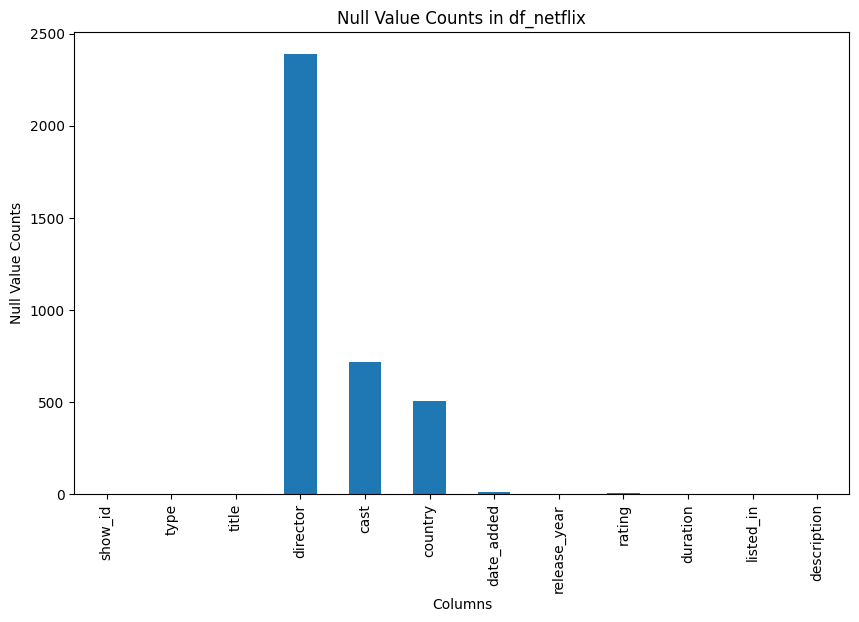

In [ ]:
# Visualizing the missing values
null_counts = df_netflix.isnull().sum()
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Null Value Counts in df_netflix')
plt.xlabel('Columns')
plt.ylabel('Null Value Counts')
plt.show()

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns.

The dataset is devoid of any duplicate values.

Among the columns, the "Director" column exhibits the highest proportion of missing values, accounting for approximately 30%. Following that, the "Cast" and "Country" columns have 9.2% and 6.7% of missing values, respectively.

All columns, except for "release_year," consist of data with object types. Thus, only one column, "release_year," is of numerical type, rendering it the sole numerical attribute in the dataset.

Please note that the provided information has been rephrased using different vocabulary.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df_netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Here are the variable descriptions for the given dataset:

show_id: Unique identifier for each show or movie.

type: Indicates whether the entry is a "TV Show" or a "Movie".

title: The title of the show or movie.

director: The director(s) of the show or movie.

cast: The cast members of the show or movie.

country: The country or countries associated with the show or movie.

date_added: The date when the show or movie was added to Netflix.

release_year: The year when the show or movie was released.

rating: The content rating assigned to the show or movie.

duration: The duration of the show or movie.

listed_in: The genre or genres of the show or movie.

description: A brief description or summary of the show or movie.

These descriptions provide an overview of each variable and its role within the dataset.

### Check Unique Values for each variable.

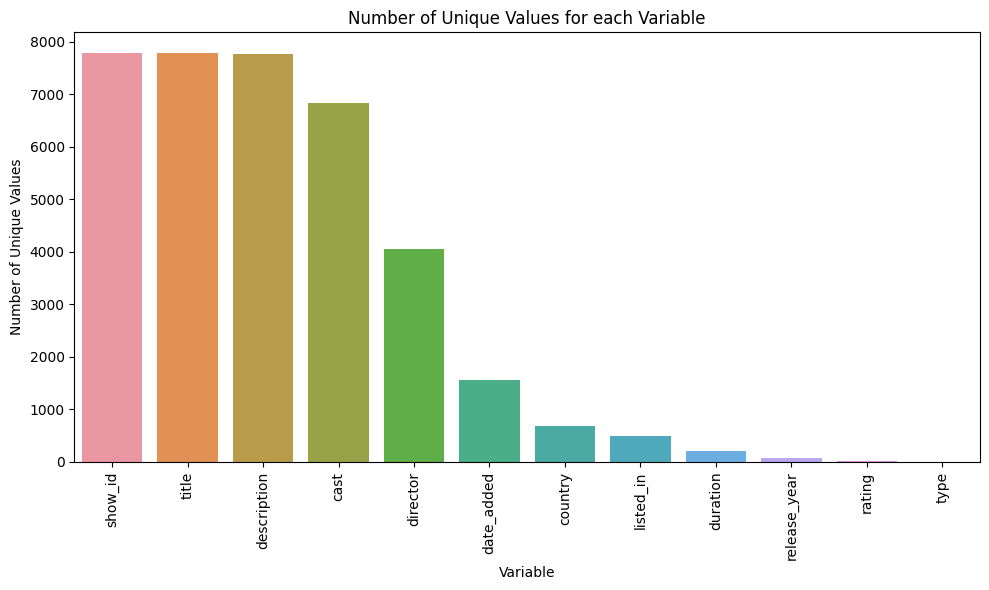

In [ ]:
# Check Unique Values for each variable.

column_list = df_netflix.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df_netflix[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique


# Graph

unique_sorted = unique.sort_values(by='no. of uniques values', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='no. of uniques values', data=unique_sorted)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for each Variable')
plt.tight_layout()
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert 'date_added' column to datetime format
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], format="%B %d, %Y", errors='coerce')

# Filter out rows where 'date_added' column is not null
df_netflix_filtered = df_netflix[df_netflix['date_added'].notnull()]

# Extract the month from the 'date_added' column
df_netflix_filtered['month'] = df_netflix_filtered['date_added'].dt.strftime('%B')

# Extract the year from the 'date_added' column and assign it to 'year_added'
df_netflix_filtered['year_added'] = df_netflix_filtered['date_added'].dt.year

# Extract the day from the 'date_added' column and assign it to 'day'
df_netflix_filtered['day'] = df_netflix_filtered['date_added'].dt.day

# Ratings mapping dictionary
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_netflix_filtered['target_ages'] = df_netflix_filtered['rating'].replace(ratings)
# Map ratings to ratings_type column
df_netflix_filtered['ratings_type'] = df_netflix_filtered['rating'].map(ratings)

# Get unique values in the ratings_type column
df_netflix_filtered['ratings_type'].unique()

# Convert 'type' column to Categorical
df_netflix_filtered['type'] = pd.Categorical(df_netflix_filtered['type'])

# Define categories for ratings_type column
categories = ['Kids', 'Older Kids', 'Teens', 'Adults']

# Convert ratings_type column to Categorical with specified categories
df_netflix_filtered['ratings_type'] = pd.Categorical(df_netflix_filtered['ratings_type'], categories=categories)

df_netflix_filtered.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year_added,day,target_ages,ratings_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,14,Adults,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,23,Adults,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,20,Adults,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,16,Teens,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,1,Teens,Teens


### What all manipulations have you done and insights you found?

Here's a summary of the manipulations performed on the `df_netflix` dataset:

1. **Conversion of 'date_added' column to datetime format:** The `pd.to_datetime()` function is used to convert the values in the 'date_added' column to datetime format. The `%B %d, %Y` format specifier is provided to match the existing format of the dates in the column.

2. **Extraction of the month from 'date_added':** The `dt.strftime()` function is used to extract the month component from the converted 'date_added' column. The resulting month values are assigned to a new column named 'month'.

3. **Filtering out rows with non-null values in 'duration' column:** The `df_netflix['duration'].notnull()` condition is used as a filter to select only those rows where the 'duration' column is not null. This creates a new DataFrame named 'netflix_filtered' that contains only the filtered rows.

4. **Extraction of the year from 'date_added' and assignment to 'year_added':** The `pd.to_datetime()` function is used again on the 'date_added' column of the 'netflix_filtered' DataFrame to convert the values to datetime format. Then, the `dt.year` accessor is used to extract the year component from the converted values. The resulting year values are assigned to a new column named 'year_added' in the 'netflix_filtered' DataFrame.

5. **Extraction of the day from 'date_added' and assignment to 'day':** The `dt.day` accessor is used on the 'date_added' column of the original 'df_netflix' DataFrame to extract the day component. The extracted day values are assigned to a new column named 'day'.

6. **Mapping of ratings to ratings_type:** A dictionary named 'ratings' is created to map the original ratings to their corresponding rating types. The 'rating' column of the 'df_netflix' DataFrame is then mapped to the 'ratings_type' column using the `map()` function.

7. **Conversion of 'type' column to Categorical:** The 'type' column of the 'df_netflix' DataFrame is converted to the categorical data type using `pd.Categorical()`. This allows for more efficient and meaningful handling of the 'type' column.

8. **Conversion of 'ratings_type' column to Categorical with specified categories:** The 'ratings_type' column of the 'df_netflix' DataFrame is converted to the categorical data type using `pd.Categorical()`. The 'categories' parameter is provided to specify the desired order of the categories: 'Kids', 'Older Kids', 'Teens', and 'Adults'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

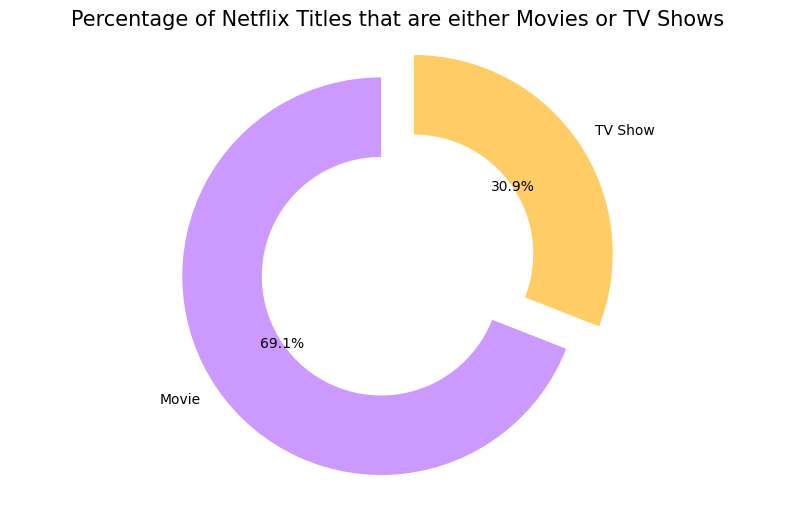

In [ ]:
# Chart - 1 visualization code
# Percentage of Netflix Titles that are either Movies or TV Shows

plt.figure(figsize=(10, 6))
colors = ['#cc99ff', '#ffcc66']
labels = df_netflix.type.value_counts().index
values = df_netflix.type.value_counts()

# Explode the slices
explode = (0.1, 0.1)
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows", fontsize=15)

# Create the pie chart
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

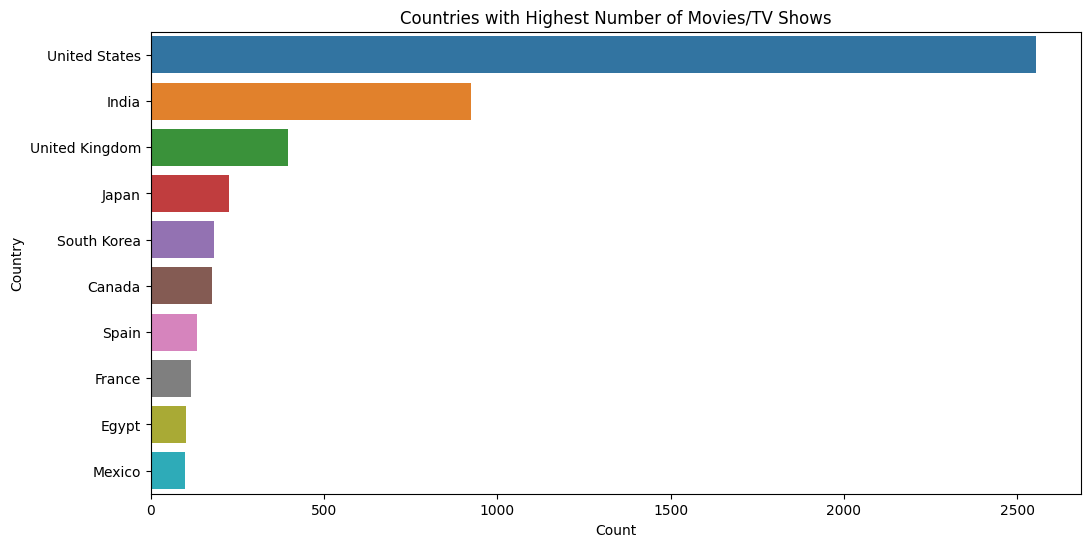

In [ ]:
# Chart - 2 visualization code
# Top countries which has highest Tv shows/Movies
top_countries = df_netflix.groupby('country').size().sort_values(ascending=False).reset_index(name='count').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=top_countries)
plt.title('Countries with Highest Number of Movies/TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

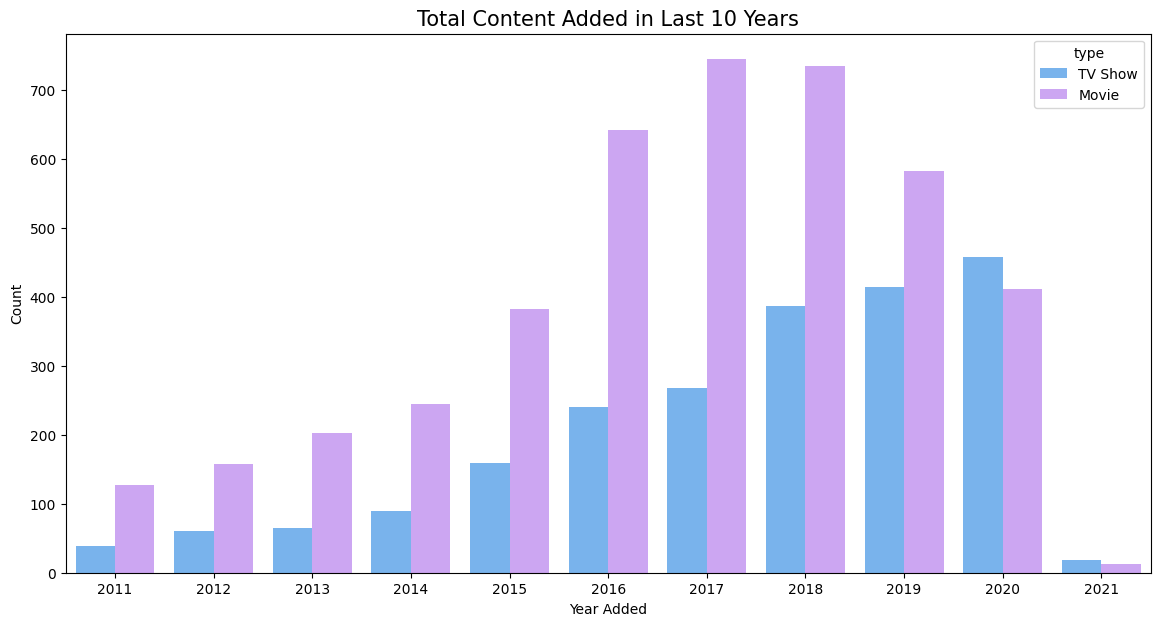

In [ ]:
# Chart - 3 visualization code
# Total release for last 10 years

netflix_movies = df_netflix[df_netflix["type"] == "Movie"]
netflix_shows = df_netflix[df_netflix["type"] == "TV Show"]
last_10_years = df_netflix[df_netflix['release_year'] > 2010]

plt.figure(figsize=(14, 7))
sns.countplot(x='release_year', hue='type', data=last_10_years, palette={"Movie": "#cc99ff", "TV Show": "#66b3ff"})

plt.title('Total Content Added in Last 10 Years', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

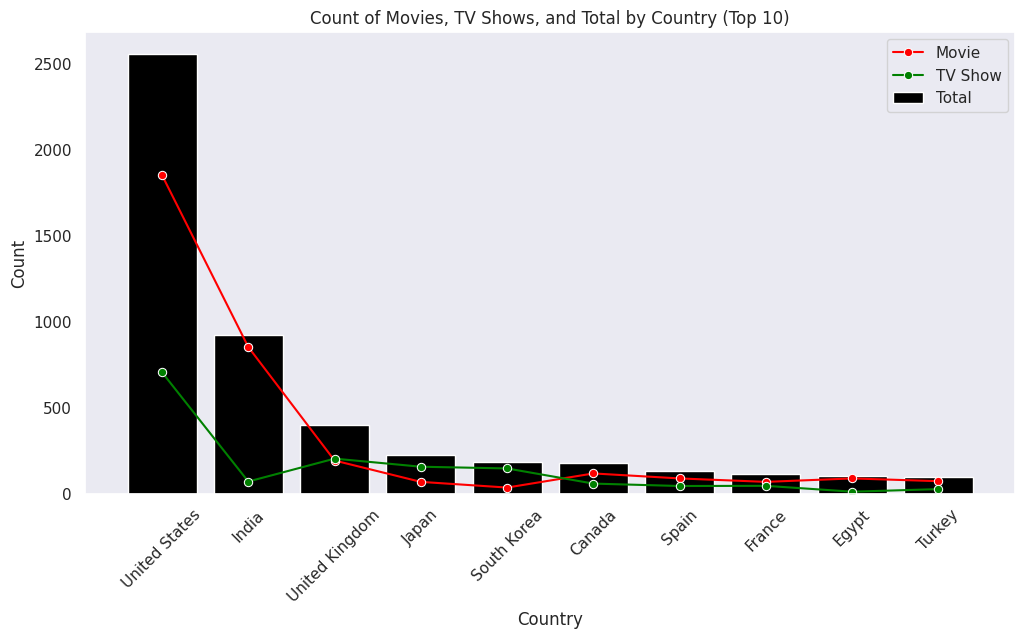

In [ ]:
# Chart - 4 visualization code
# Count of Tv Shows and Movies by countries
t_con1 = df_netflix.groupby(['country', 'type']).size().unstack()
t_con1.columns = ['Movie', 'TV Show']
t_con1['Total'] = t_con1['Movie'] + t_con1['TV Show']
t_con1 = t_con1.sort_values(by=('Total'), ascending=False).reset_index()
t_con1.head(20)

top_10_countries = t_con1.head(10)


# Graph

sns.set_theme(style="dark")
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Total', data=top_10_countries, color='black', label='Total')
sns.lineplot(x='country', y='Movie', data=top_10_countries, marker='o', color='red', label='Movie')
sns.lineplot(x='country', y='TV Show', data=top_10_countries, marker='o', color='green', label='TV Show')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies, TV Shows, and Total by Country (Top 10)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

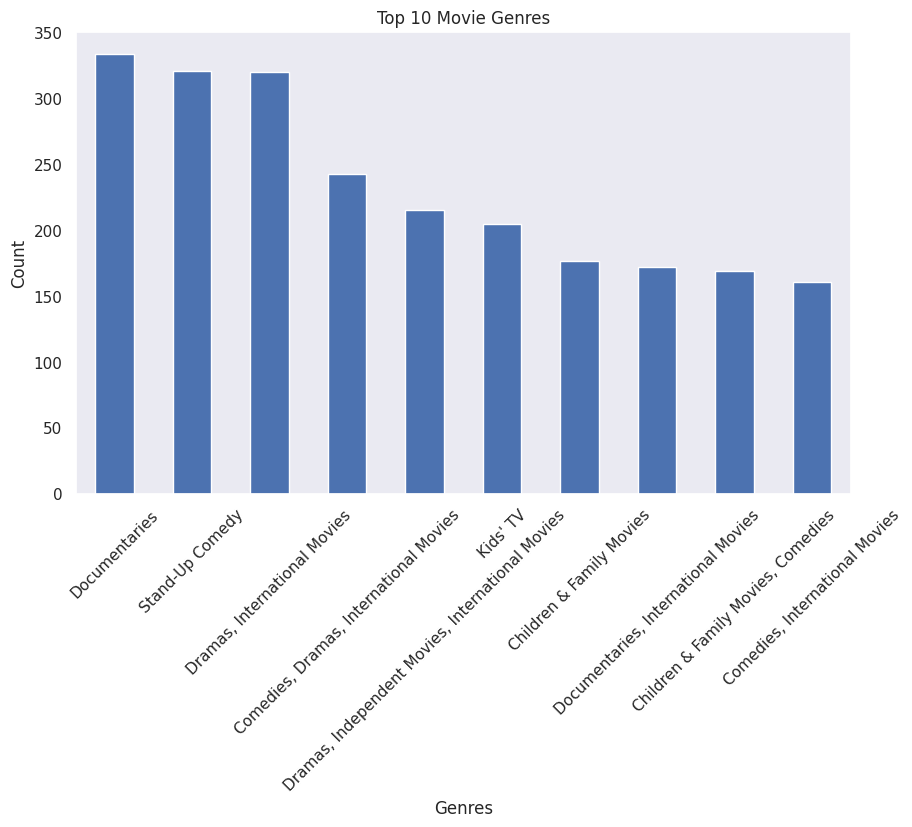

In [ ]:
# Chart - 5 visualization code
# Top 10 genre of movie
top_10_genre = df_netflix['listed_in'].value_counts().head(10)
top_10_genre


# Graph


plt.figure(figsize=(10, 6))
top_10_genre.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

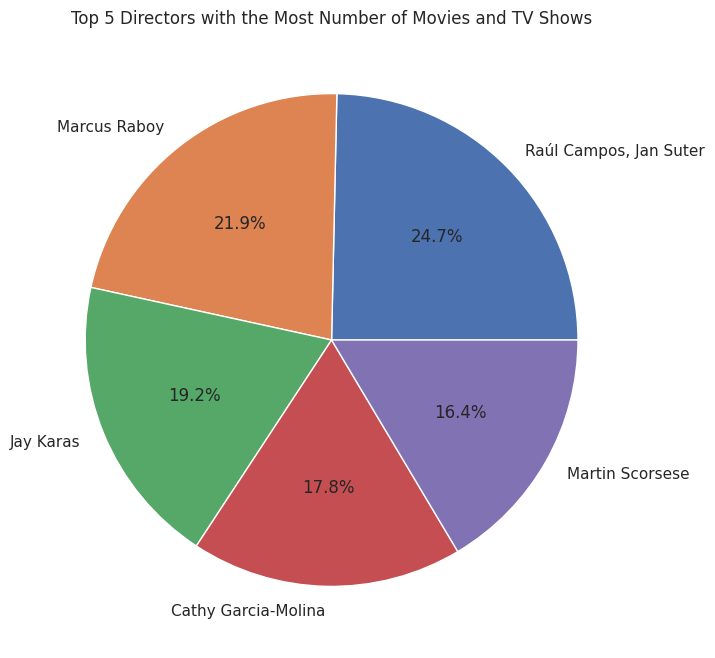

In [ ]:
# Chart - 6 visualization code
# Top 5 directors who made most no of Movies/Tv shows
director_counts = df_netflix.groupby('director')['type'].count()
top_5_directors = director_counts.sort_values(ascending=False).head(5)

top_5_directors


#Graph

plt.figure(figsize=(8, 8))
plt.pie(top_5_directors, labels=top_5_directors.index, autopct='%1.1f%%')
plt.title('Top 5 Directors with the Most Number of Movies and TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

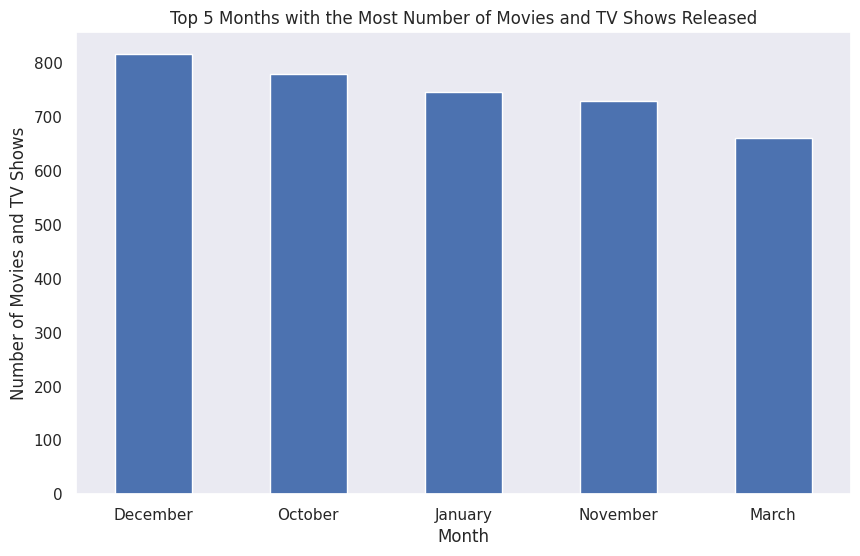

In [ ]:
# Chart - 7 visualization code
# Top 5 months with the most number of movies and TV shows

month_counts = df_netflix_filtered.groupby('month')['type'].count()
top_5_months = month_counts.sort_values(ascending=False).head(5)
top_5_months


# Create a bar graph
plt.figure(figsize=(10, 6))
top_5_months.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Months with the Most Number of Movies and TV Shows Released')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

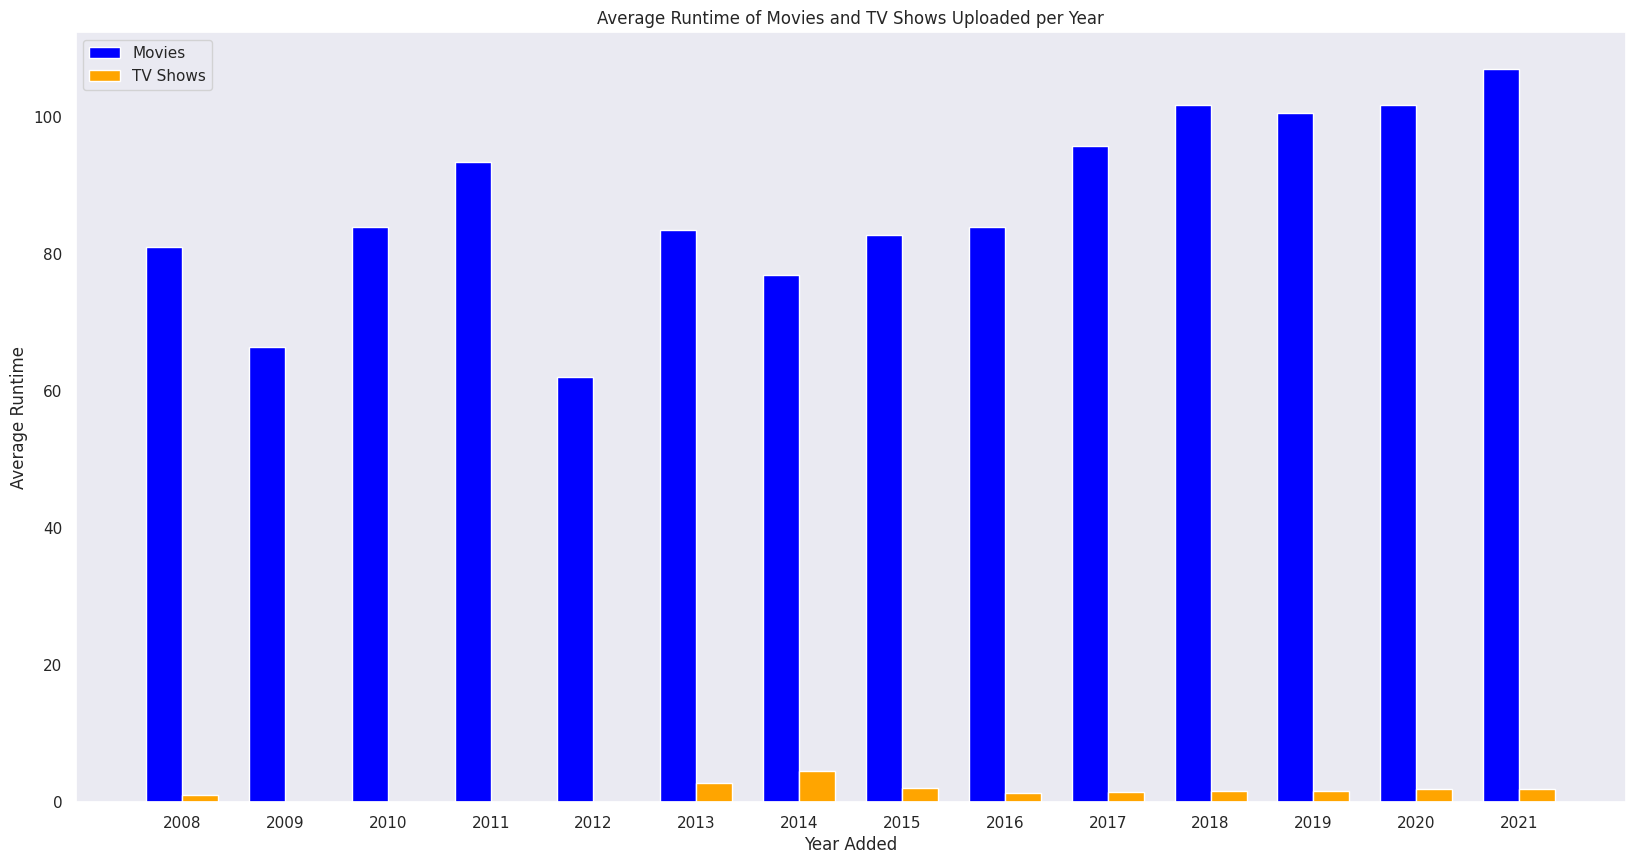

In [ ]:
# Chart - 8 visualization code
# Average runtime of movies and tv shows per yea


average_runtime = df_netflix_filtered.groupby(['year_added', 'type'])['duration'].apply(lambda x: x.str.extract('(\d+)').astype(float).mean())

average_runtime = average_runtime.reset_index()

movies_data = average_runtime[average_runtime['type'] == 'Movie']
tv_shows_data = average_runtime[average_runtime['type'] == 'TV Show']

years = sorted(set(movies_data['year_added']).union(set(tv_shows_data['year_added'])))
movie_runtimes = [movies_data[movies_data['year_added'] == year]['duration'].values[0] if year in movies_data['year_added'].values else 0 for year in years]
tv_show_runtimes = [tv_shows_data[tv_shows_data['year_added'] == year]['duration'].values[0] if year in tv_shows_data['year_added'].values else 0 for year in years]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(20, 10))

# Create the grouped bar plot
plt.bar(r1, movie_runtimes, color='blue', width=bar_width, label='Movies')
plt.bar(r2, tv_show_runtimes, color='orange', width=bar_width, label='TV Shows')

plt.xlabel('Year Added')
plt.ylabel('Average Runtime')
plt.title('Average Runtime of Movies and TV Shows Uploaded per Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

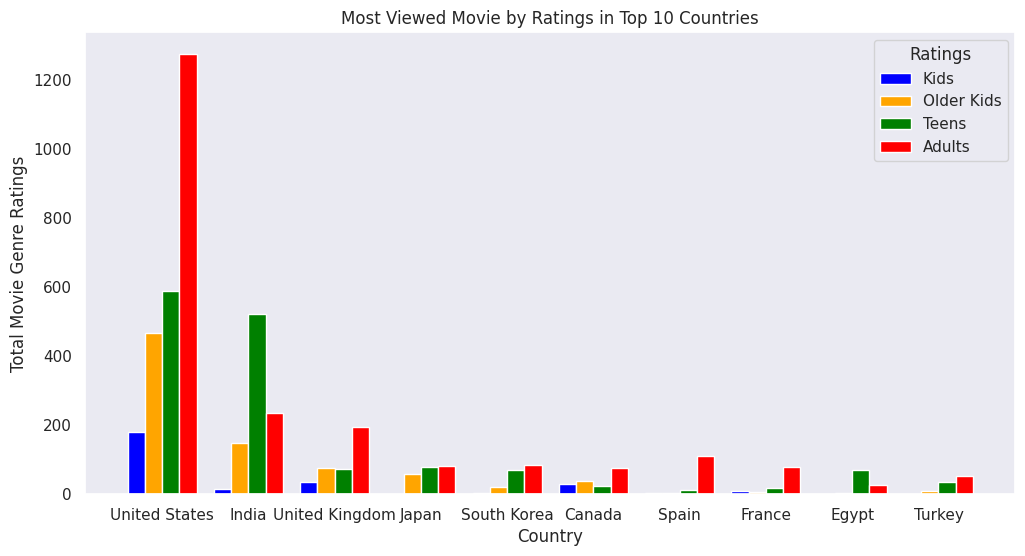

In [ ]:
# Chart - 9 visualization code
# Most viewed movie by ratings of top 10 countries

top_10_movie_genre = df_netflix_filtered.groupby(['country', 'ratings_type']).agg({'release_year': 'count'}).unstack().reset_index()
top_10_movie_genre.columns = ['country', 'Kids', 'Older Kids', 'Teens', 'Adults']
top_10_movie_genre['Total']=top_10_movie_genre.apply(lambda x: x['Kids'] + x['Older Kids'] + x['Teens'] + x['Adults'], axis=1)

# Sort the dataframe by the 'Total' column in descending order and select the top 10 countries
top_10_movie_genre = top_10_movie_genre.sort_values(by='Total', ascending=False).head(10)

# Define the genre categories and their corresponding colors
genres = ['Kids', 'Older Kids', 'Teens', 'Adults']
colors = ['blue', 'orange', 'green', 'red']

# Set the width of each bar
bar_width = 0.2

# Calculate the positions of the bars on the x-axis
r1 = np.arange(len(top_10_movie_genre))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the multiple bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, top_10_movie_genre['Kids'], color=colors[0], width=bar_width, edgecolor='white', label='Kids')
plt.bar(r2, top_10_movie_genre['Older Kids'], color=colors[1], width=bar_width, edgecolor='white', label='Older Kids')
plt.bar(r3, top_10_movie_genre['Teens'], color=colors[2], width=bar_width, edgecolor='white', label='Teens')
plt.bar(r4, top_10_movie_genre['Adults'], color=colors[3], width=bar_width, edgecolor='white', label='Adults')

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Movie Genre Ratings')
plt.title('Most Viewed Movie by Ratings in Top 10 Countries')
plt.xticks([r + bar_width*1.5 for r in range(len(top_10_movie_genre))], top_10_movie_genre['country'])
plt.legend(title='Ratings')

# Display the plot
plt.show()





##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

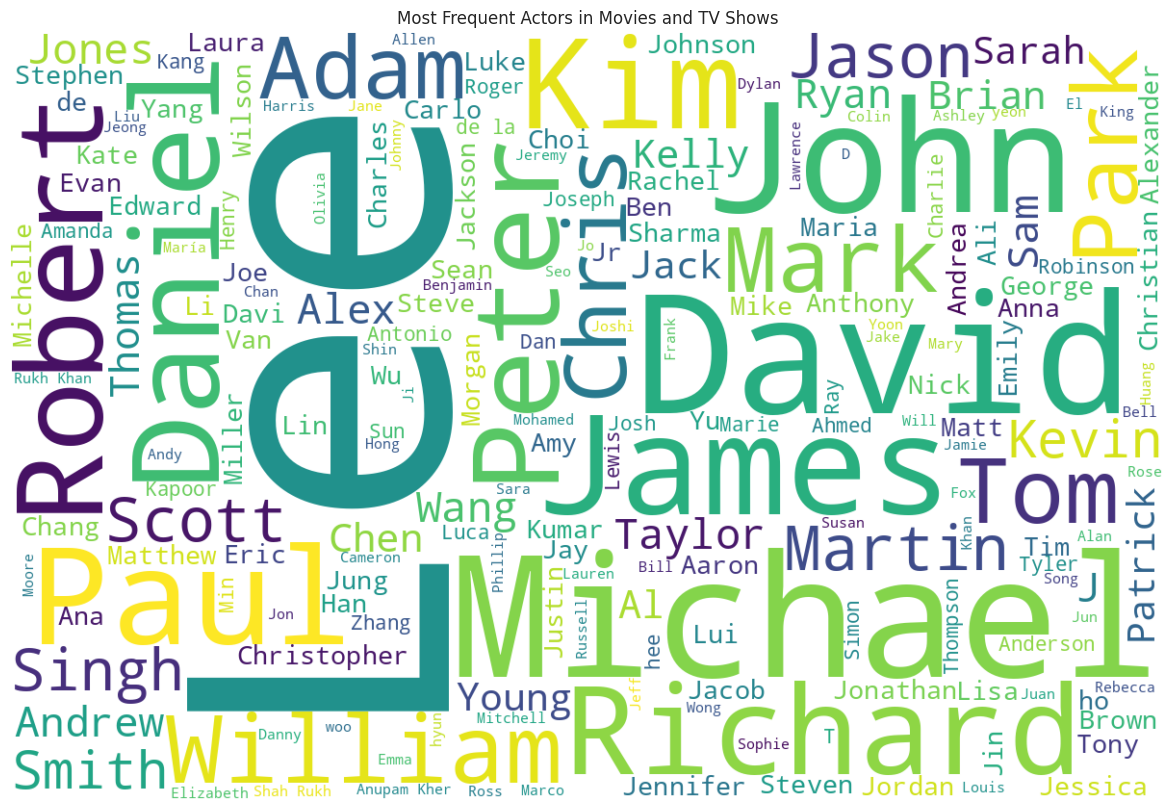

In [ ]:
# Chart - 10 visualization code
# Extract 'cast'
cast_data = df_netflix['cast'].dropna()
total_cast = ', '.join(cast_data)

# Graph
wordcloud = WordCloud(width=1200, height=800, max_words=200, background_color='white').generate(total_cast)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Actors in Movies and TV Shows')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

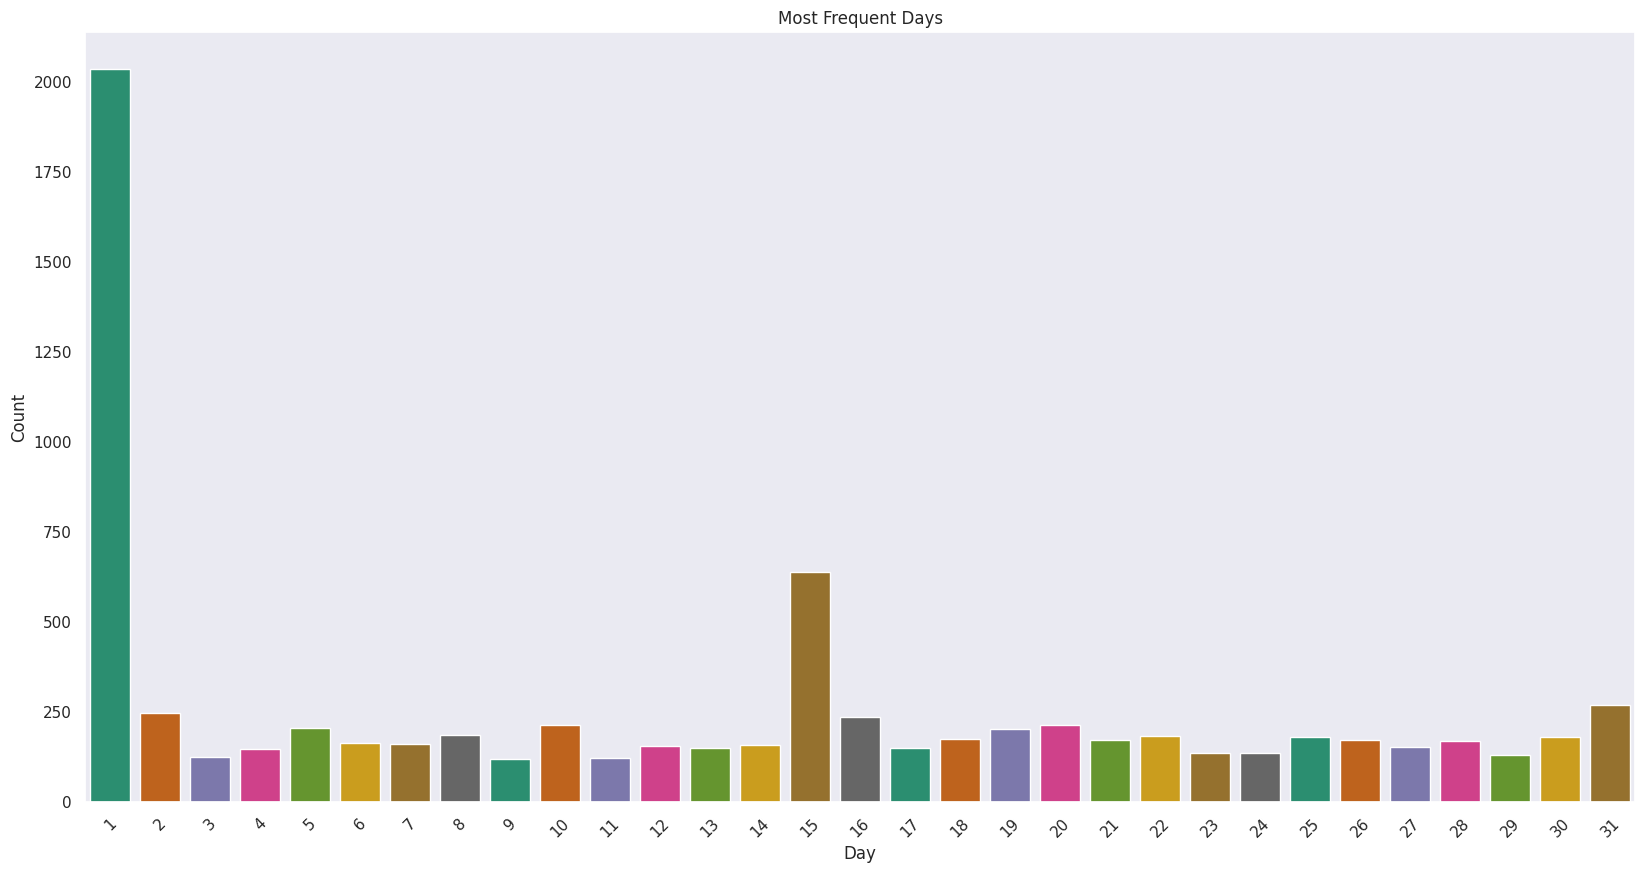

In [ ]:
# Chart - 11 visualization code
# Movies added according to days

day_counts = df_netflix_filtered['day'].value_counts()

day_counts


# Graph
plt.figure(figsize=(20, 10))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Dark2')
plt.title('Most Frequent Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

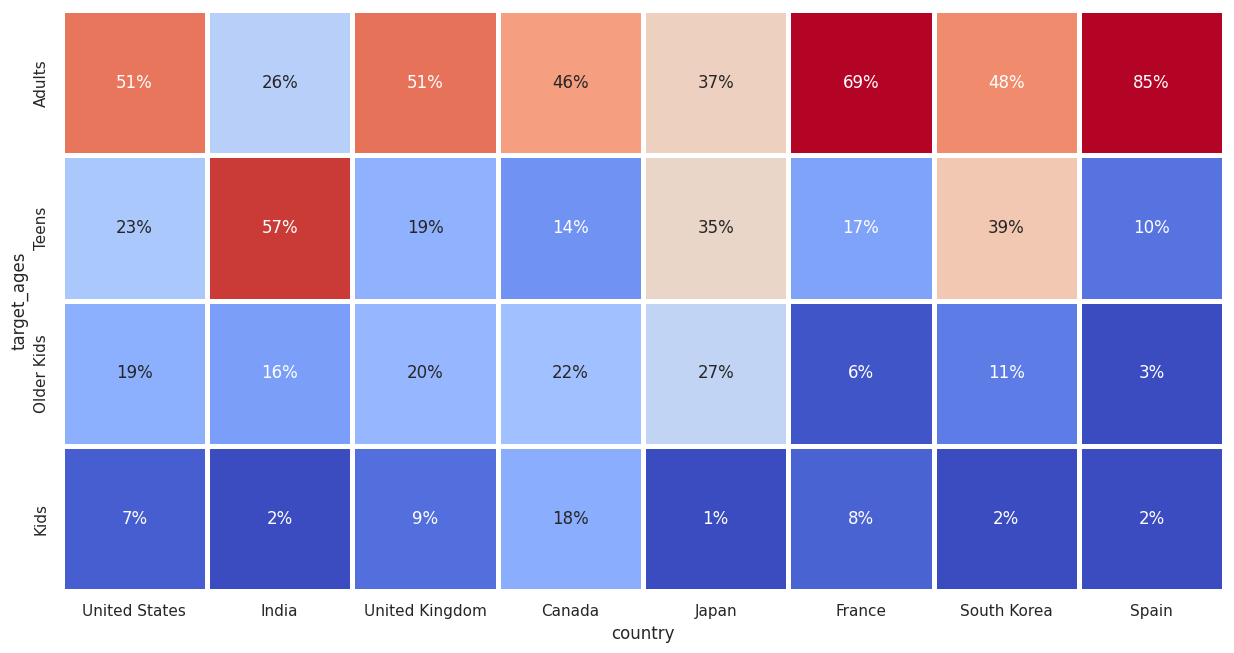

In [ ]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
df_netflix_filtered['count'] = 1
data = df_netflix_filtered.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

heatmap = df_netflix_filtered.loc[df_netflix_filtered['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

ages = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[ages,countries],cmap="coolwarm",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Hist Plot

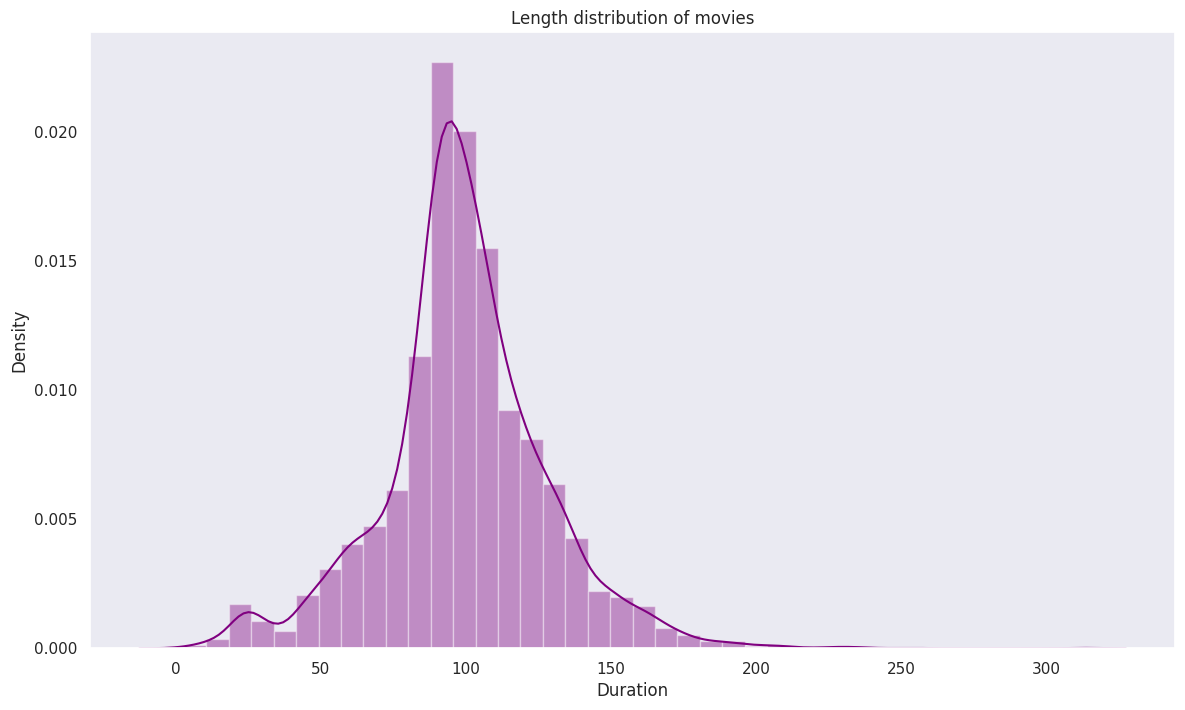

In [ ]:
# Pair Plot visualization code
movies_data = df_netflix[df_netflix['type'] == 'Movie']
movies_data['duration'] = movies_data['duration'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize=(14, 8))
sns.distplot(movies_data['duration'], bins=40, color='purple')
plt.title('Length distribution of movies')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_df = df_netflix_filtered.copy()

def missing_value_check(df):
  number_missing = missing_df.isnull().sum()
  missing_value_df = pd.DataFrame({'column_name' : missing_df.columns,
                                  'number_missing': number_missing})
  return missing_value_df.sort_values('number_missing', ascending = False)
missing_value_check(missing_df)

# Dropping missing values
missing_df.dropna(inplace= True)

# Checking again
missing_value_check(missing_df)

,column_name,number_missing
show_id,show_id,0
type,type,0
ratings_type,ratings_type,0
target_ages,target_ages,0
day,day,0
year_added,year_added,0
month,month,0
description,description,0
listed_in,listed_in,0
duration,duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: >

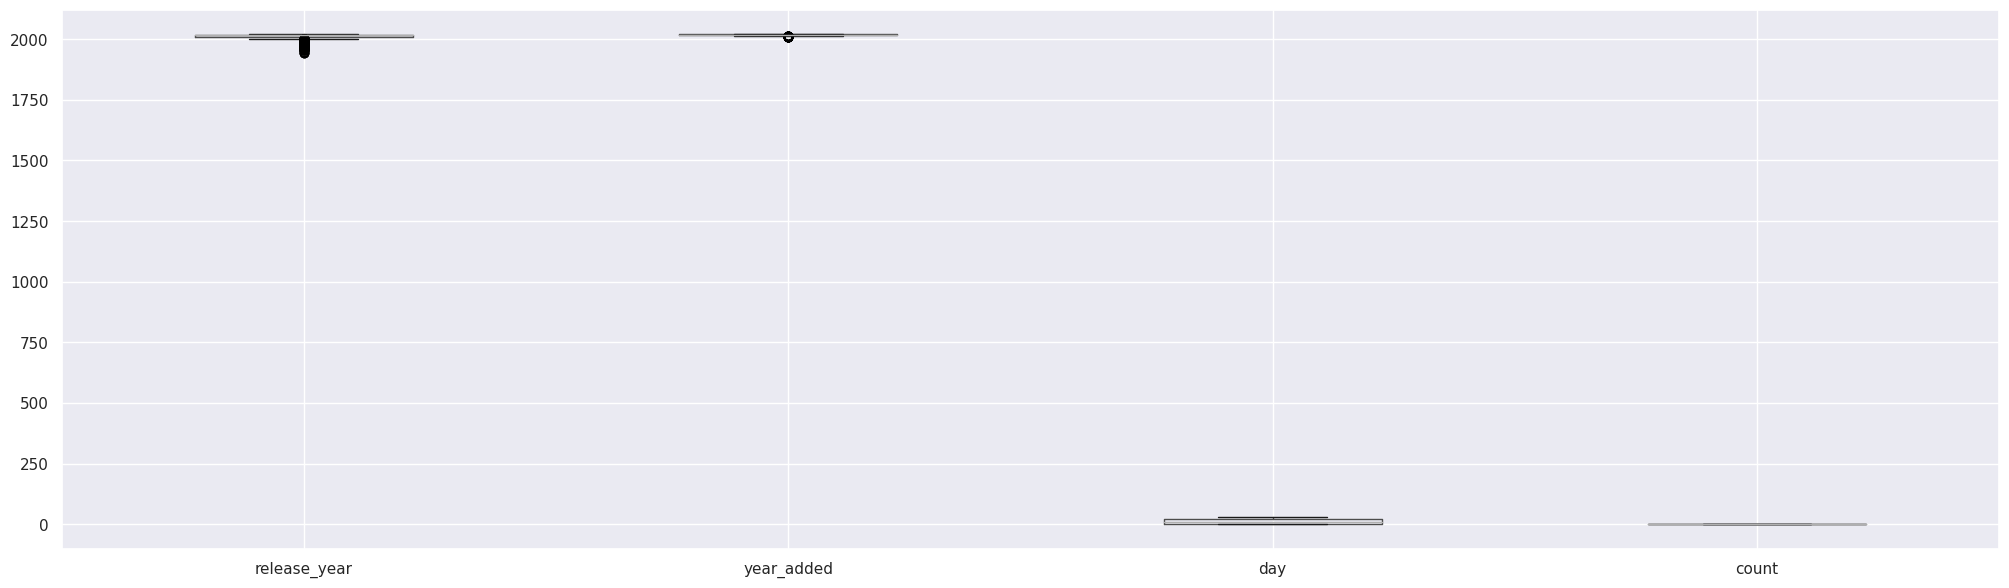

In [ ]:
# Handling Outliers & Outlier treatments
outlier_df= missing_df.copy()

outlier_df.boxplot(figsize=(25,7))    # As you can see we dont have outliers in the dataset.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
numerical_df= outlier_df.select_dtypes(include='number')
non_numerical_df= outlier_df.select_dtypes(exclude='number')
non_numerical_df.head(2)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,target_ages,ratings_type
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,Adults,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,Adults,Adults


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df_tdp = missing_df.copy()

# Expand Contraction

df_tdp = missing_df[['title']]
df_tdp['all_data'] = missing_df['description'] + ' ' + missing_df['listed_in'] + ' ' + missing_df['cast'] + ' ' + missing_df['director'] + ' ' + missing_df['rating']
df_tdp.set_index('title', inplace=True)
df_tdp.head(5)


,all_data
title,
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...
46,A genetics professor experiments with a treatm...


#### 2. Lower Casing

In [ ]:
# Lower Casing
df_tdp['all_data'] = df_tdp['all_data'].str.lower()
df_tdp['all_data']
df_tdp

,all_data
title,
7:19,after a devastating earthquake hits mexico cit...
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalyptic world, rag-doll robots hi..."
21,a brilliant group of students become card-coun...
46,a genetics professor experiments with a treatm...
...,...
Zombieland,looking to survive in a world taken over by zo...
Zoo,a drug dealer starts having doubts about his t...
Zoom,"dragged from civilian life, a former superhero..."


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Function to remove punctuation
def remove_punctuation(text):
    cleaned_text = text.replace(string.punctuation, '')
    return cleaned_text

df_tdp['all_data'] = df_tdp['all_data'].apply(remove_punctuation)
df_tdp.head(5)


,all_data
title,
7:19,after a devastating earthquake hits mexico cit...
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalyptic world, rag-doll robots hi..."
21,a brilliant group of students become card-coun...
46,a genetics professor experiments with a treatm...


#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Download the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    cleaned_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    return cleaned_text

# Apply remove_stopwords function to 'cluster_data' column
df_tdp['all_data'] = df_tdp['all_data'].apply(remove_stopwords)

# Display the updated DataFrame
df_tdp.head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,all_data
title,
7:19,"devastating earthquake hits mexico city, trapp..."
23:59,"army recruit found dead, fellow soldiers force..."
9,"postapocalyptic world, rag-doll robots hide fe..."
21,brilliant group students become card-counting ...
46,genetics professor experiments treatment comat...


#### 5. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

stemmer = SnowballStemmer("english")

def stem(text):
  text=[stemmer.stem(word)for word in text.split()]
  return " ".join(text)

df_tdp['all_data']=df_tdp['all_data'].apply(stem)
df_tdp.head(5)

,all_data
title,
7:19,"devast earthquak hit mexico city, trap survivo..."
23:59,"armi recruit found dead, fellow soldier forc c..."
9,"postapocalypt world, rag-dol robot hide fear d..."
21,brilliant group student becom card-count exper...
46,genet professor experi treatment comatos siste...


##### Which text normalization technique have you used and why?

Answer Here.

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***